In [1]:
import os
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
# %matplotlib widget
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from ilt_data import PNGFolderDataset, tensor_to_image
from ilt_model import LithoZernikeRegressor
# torch.multiprocessing.set_start_method('spawn')
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning, message='Torchinductor does not support code generation for complex operators. Performance may be worse than eager.')

In [2]:
DATASET_ROOT = os.path.join('..', 'dataset', 'train_layouts')
workers = 16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# torch.zeros((1,), device=device)

In [3]:
# -------- 3. DataLoader --------
def make_dataloaders(root, batch_size=16, num_zernike=20, split=0.8, workers=1):
    dataset = PNGFolderDataset(root, N_zernike=num_zernike, image_size=1024, aberr_max=3., device=device)
    train_size = int(split * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=workers)
    return train_loader, val_loader, dataset

Aberrations: Z=[-1.2000992  2.0354204 -2.6967373  2.480184   0.6640452 -1.4494426]


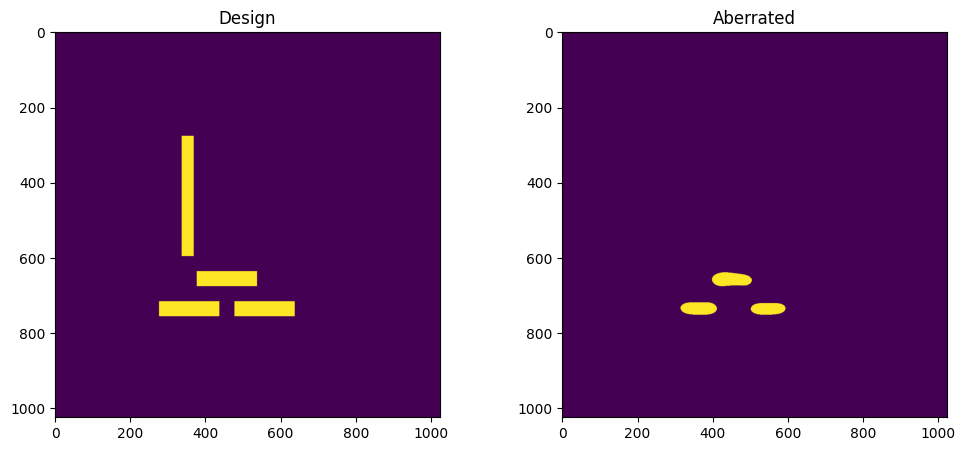

In [4]:
train_loader, val_loader, dataset = make_dataloaders(DATASET_ROOT, batch_size=1, num_zernike=6, workers=0)
a = next(iter(train_loader))
i = 0

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
plt.imshow(dataset.intensity_tensor_to_image(a[0][i][0]))
ax.set_title("Design")
ax = plt.subplot(1,2,2)
plt.imshow(dataset.intensity_tensor_to_image(a[0][i][1]))
ax.set_title("Aberrated")
print(f"Aberrations: Z={a[1][i].cpu().numpy()}")
plt.show()

In [5]:
# -------- 4. Training --------
"mobilenet_v3_small" # 1.5 M / 1.06 m
"mobilenet_v3_large" # 4.2 M / 1.13 m
"efficientnet_b0"    # 4.0 M / 1.45 m
train_loader, val_loader, dataset = make_dataloaders(DATASET_ROOT, batch_size=24, num_zernike=6, workers=0)
model = LithoZernikeRegressor("mobilenet_v3_large", num_zernike=6, lr=1e-3, checkpointing=False)
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    save_top_k=1,
    mode='min',
    filename='best-model'
)
logger = TensorBoardLogger(".", name="lightning_logs")

trainer = Trainer(max_epochs=30, accelerator="auto", callbacks=[checkpoint_callback],
                  accumulate_grad_batches = 16, gradient_clip_val=1.,
                  logger=logger,
                  precision="16-mixed"
          )
trainer.fit(model, train_loader, val_loader)

/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type        | Params | Mode 
-------------------------------------------------
0 | sim      | LTSim

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [6]:
final_val_loss = trainer.callback_metrics['val_loss'].item()
print('Final validation loss:', final_val_loss)

Final validation loss: 0.0014144888846203685


In [7]:
# assert False

## Test

In [8]:
batch = next(iter(val_loader))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imgs, z_true = batch
imgs, z_true = imgs[:8].to(device), z_true[:8].to(device)

In [9]:
##### CLEAR CACHE #####
# model.cpu()
# from gc import collect
# imgs, z_true = None, None
# litho_imgs, aberr_imgs, restored_imgs = None, None, None
# z_preds = None
# batch = None
# collect()
# torch.cuda.empty_cache()
# collect()

In [10]:
model.to(device)
litho_aberr_imgs = imgs[:, 1:]
z_preds = model(litho_aberr_imgs)
print(z_preds[0], z_true[0])

tensor([ 0.0921, -1.7684,  1.2981, -0.7502,  2.3650, -0.7788], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([ 0.4503, -1.8836,  1.2578,  0.0438,  2.3861, -0.7494], device='cuda:0')


In [11]:
design_imgs, litho_imgs, aberr_imgs = torch.split(imgs, 1, dim=1) # [B, 3, H, W] -> [B, (1, 1, 1), H, W]
# restored_imgs = model.sim.run_lithosim(aberr_imgs, zernike_coeffs=z_preds)
with torch.autocast(device_type=device.type):
    modelled_imgs = model.sim.run_lithosim(design_imgs, zernike_coeffs=z_preds)

tensor([[ 0.0921, -1.7684,  1.2981, -0.7502,  2.3650, -0.7788]],
       device='cuda:0', grad_fn=<SliceBackward0>)


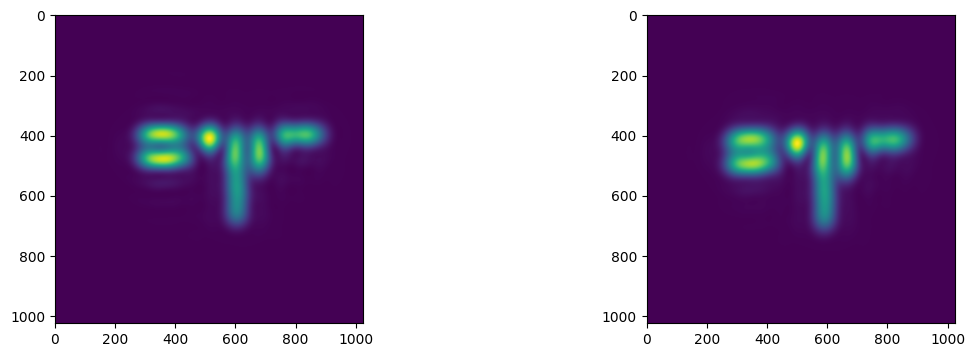

In [12]:
z = z_preds[:1].clone()
z[0,-2] = 1.
with torch.autocast(device_type=device.type):
    # litho = model.sim.run_lithosim(litho_imgs[:1])
    litho = litho_imgs[:1]
    aberr = model.sim.run_lithosim(design_imgs[:1], zernike_coeffs=z)
    
fig = plt.figure(figsize=(14,4))
ax = plt.subplot(1,2,1)
# plt.imshow(dataset.intensity_tensor_to_image(litho[0]))
# # ax.set_title(f"Design {i+1}")
# ax = plt.subplot(1,2,2)
# plt.imshow(dataset.intensity_tensor_to_image(aberr[0]))
plt.imshow(tensor_to_image(litho[0]))
# ax.set_title(f"Design {i+1}")
ax = plt.subplot(1,2,2)
plt.imshow(tensor_to_image(aberr[0]))
# ax.set_title(f"Aberrated {i+1}")
print(z_preds[:1])

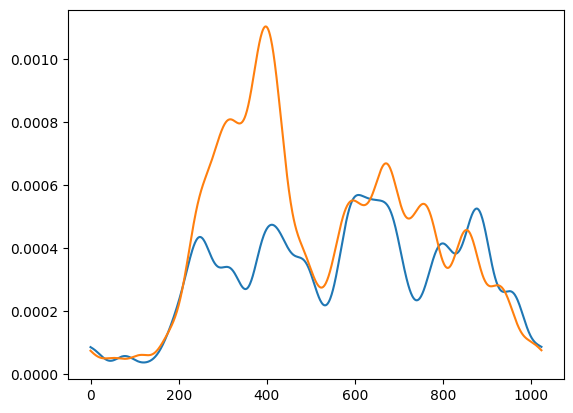

In [13]:
plt.plot(tensor_to_image(litho[0])[220])
plt.plot(tensor_to_image(aberr[0])[220])

Aberrations: Z=[ 0.4503429  -1.8835559   1.2577636   0.04380298  2.3860617  -0.7494469 ]
Preds=[ 0.09209916 -1.7684433   1.2981088  -0.75022805  2.3649588  -0.7787773 ]


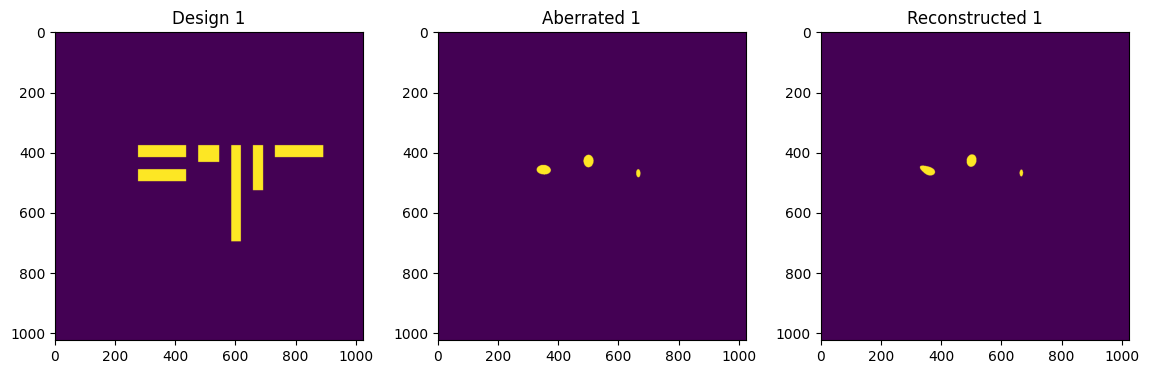

Aberrations: Z=[ 1.207621    0.07298756  2.3898506  -0.39268094  1.8789521  -0.6197258 ]
Preds=[-0.0245031   0.1270191   2.5017178  -0.89583987  2.133895   -0.4678011 ]


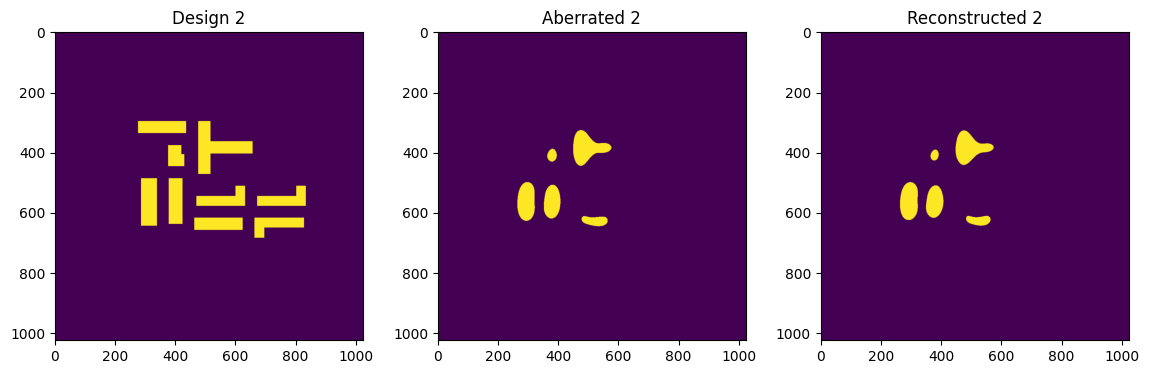

Aberrations: Z=[-2.8240914   0.84880865 -2.3507547   1.1557828  -1.1638906  -2.99508   ]
Preds=[-0.20108023  1.0109558  -2.9723418  -1.2515752   2.6164196   1.6207483 ]


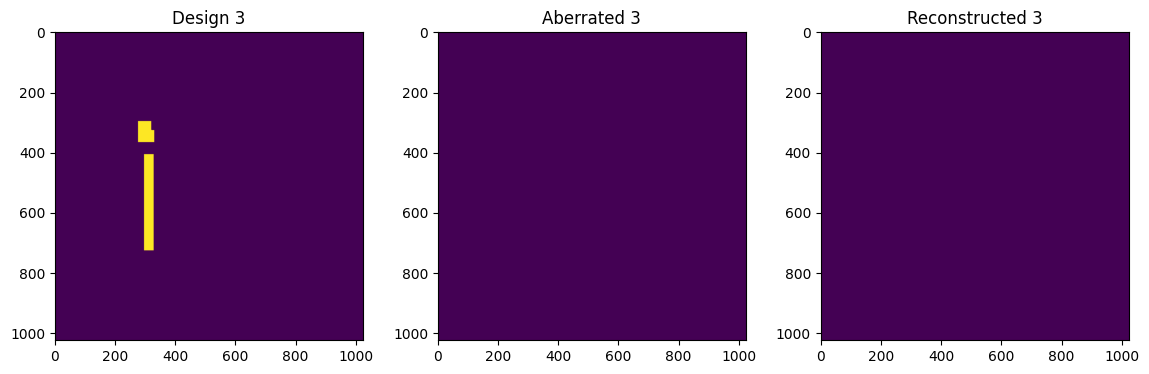

Aberrations: Z=[ 1.1387597  -2.9295878  -1.6440859   0.16670322  0.9289774   1.806079  ]
Preds=[ 0.0325784  -2.670873   -1.8907228  -0.17997748  1.749263    0.9275179 ]


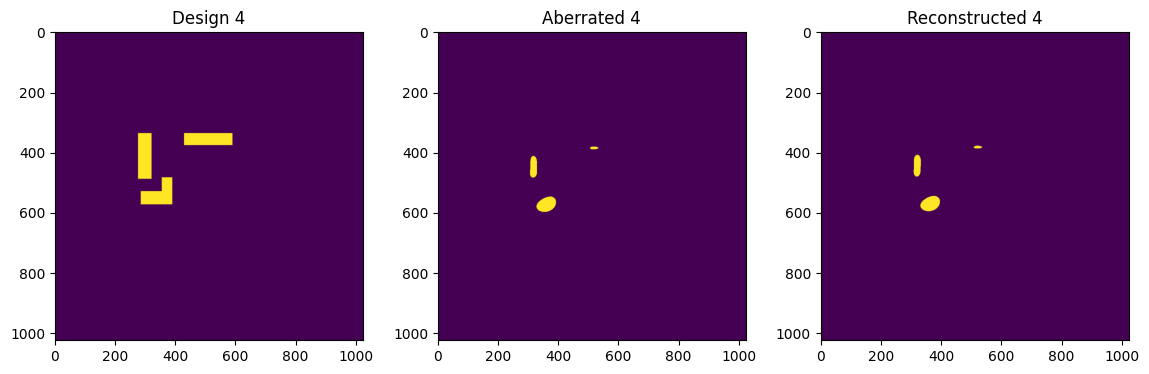

Aberrations: Z=[-0.46327418 -1.9217422  -0.9495746   2.5012808   2.20633     0.1736759 ]
Preds=[-0.04484468 -1.6745738  -1.0955986   2.8578494   2.1818597   0.03987993]


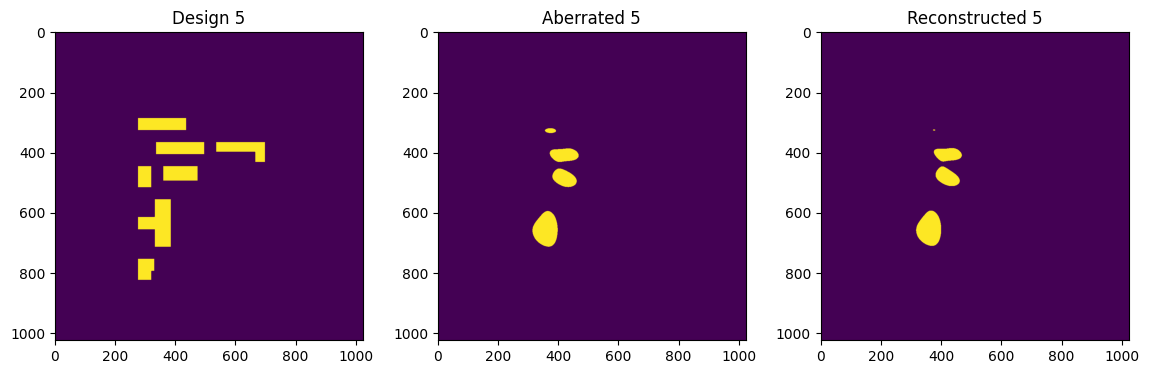

Aberrations: Z=[ 0.69263005 -0.5645206   1.336362   -2.241035   -2.2806365  -0.36848438]
Preds=[-0.14931832 -0.35584825  1.3384379   1.881703    2.1330392  -0.034847  ]


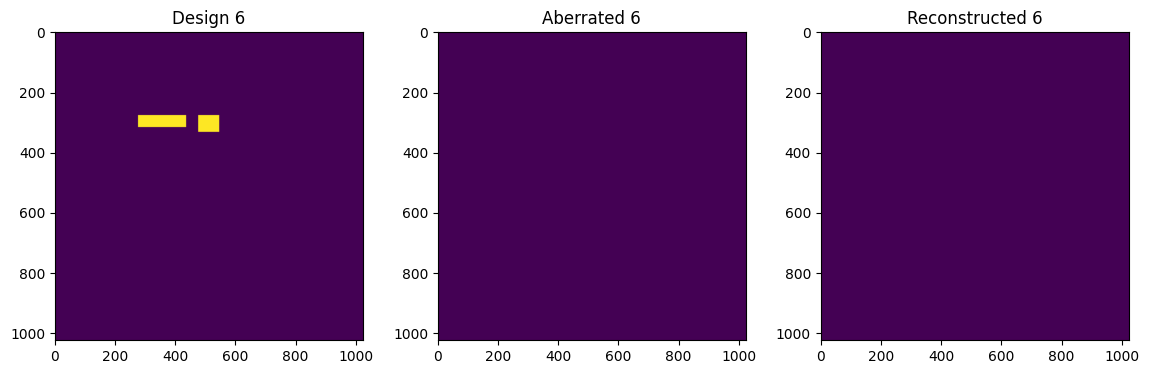

Aberrations: Z=[-1.5704324   0.4744649   0.2736826   2.0084224  -0.6129536   0.50649583]
Preds=[ 0.03777334  0.59169596  0.20687026 -1.0450867   1.148259   -0.1844309 ]


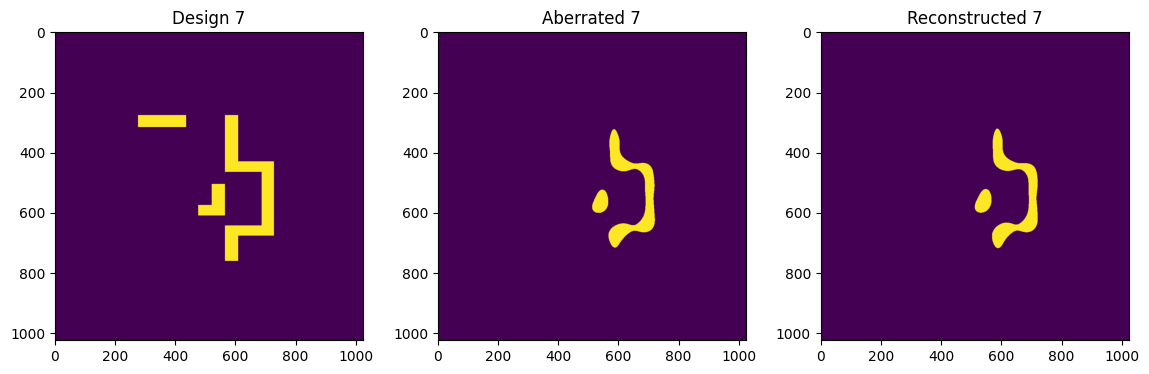

Aberrations: Z=[ 0.15905249  1.1822369  -2.4140792  -0.765923    0.4344517  -1.4848981 ]
Preds=[-0.03820442  1.0790888  -2.6001344  -0.37646025  1.2886417  -0.5394627 ]


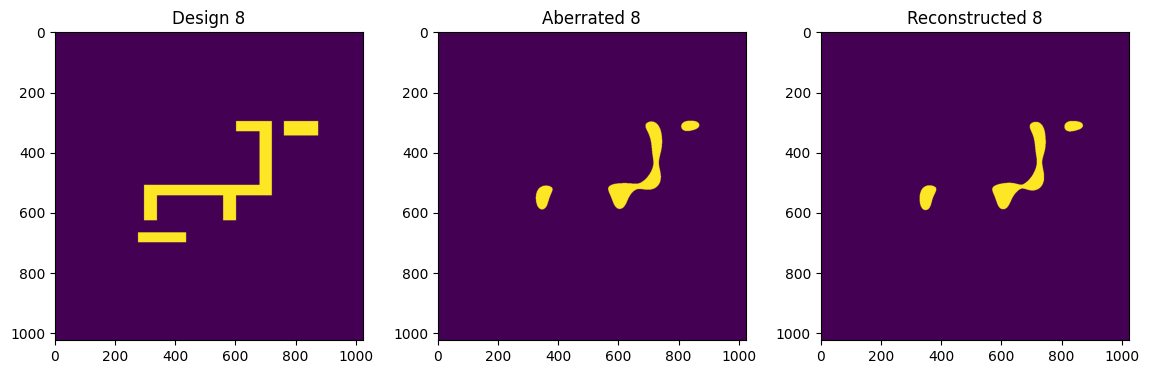

In [14]:
# i = 1
for i in range(imgs.shape[0]):

    fig = plt.figure(figsize=(14,4))
    ax = plt.subplot(1,3,1)
    plt.imshow(dataset.intensity_tensor_to_image(design_imgs[i]))
    ax.set_title(f"Design {i+1}")
    ax = plt.subplot(1,3,2)
    plt.imshow(dataset.intensity_tensor_to_image(aberr_imgs[i]))
    ax.set_title(f"Aberrated {i+1}")
    ax = plt.subplot(1,3,3)
    plt.imshow(dataset.intensity_tensor_to_image(modelled_imgs[i]))
    ax.set_title(f"Reconstructed {i+1}")
    print(f"Aberrations: Z={z_true[i].cpu().numpy()}\nPreds={z_preds[i].detach().cpu().numpy()}")
    plt.show()

In [15]:
# loss = model.loss_func(restored_imgs, litho_imgs) * 1e4
loss = model.loss_func(modelled_imgs, aberr_imgs, reduction='mean')
loss

tensor(0.0006, device='cuda:0', grad_fn=<MeanBackward0>)

In [16]:
# Получить финальный val_loss
final_val_loss = trainer.callback_metrics['val_loss'].item()
print('Final validation loss:', final_val_loss)

# Где лежит best checkpoint
print('Best model saved at:', checkpoint_callback.best_model_path)

# Сохранить вручную
torch.save(model.state_dict(), 'final_model MobileNetV3 1024.pt')

Final validation loss: 0.0014144888846203685
Best model saved at: ./lightning_logs/version_0/checkpoints/best-model.ckpt
